In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

import warnings
warnings.filterwarnings('ignore')

## -------------------------------------------------       BUSINESS PROBLEM 1        -----------------------------------------------

#### Importing data

In [2]:
loans = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Basic Statistics - Hypothesis Testing/LoansData.csv')

#### UDFs

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary( x ):
    
    n_tot = x.isnull().count()
    n_miss = x.isnull().sum()
    n_miss_perc = n_miss / n_tot
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_tot, x.count(), n_miss, n_miss_perc, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'n_miss', 'n_miss_perc',
                             'sum', 'var', 'std', 'mean',
                             'iqr', 'lc_iqr', 'uc_iqr',
                             'min', 'p1', 'p5', 'p10', 
                             'p25', 'p50', 'p75', 
                             'p90', 'p95', 'p99', 'max'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

#### MetaData Check

In [5]:
#Checking if the data is imported correctly or not
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [6]:
loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
#Duplicate Detection
print(sum(loans.duplicated(keep='first')),"transaction rows affected")

0 transaction rows affected


In [8]:
#Missing values Identification
loans.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

##### Observations
1) variable names are not following the INC rules
2) Interest Rate, Debt to Income Ratio requires datatype change
3) No duplicate records in the dataset
4) Dataset requires missing value treatment

##### Rename the variable to follow INC rules

In [9]:
loans.columns = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length']

In [10]:
loans.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


##### Datatype conversion

In [11]:
#formatting Interest_Rate column to remove '%'
loans.loc[:, 'Interest_Rate'] = loans.Interest_Rate.str.replace('%', ' ').astype('float')

In [12]:
#formatting Debt_To_Income_Ratio column to remove '%'
loans.loc[:, 'Debt_To_Income_Ratio'] = loans.Debt_To_Income_Ratio.str.replace('%', ' ').astype('float')

In [13]:
print(loans.Interest_Rate.dtype)
print(loans.Debt_To_Income_Ratio.dtype)

float64
float64


##### Missing Value Treatment

In [14]:
#Percentage of Missing values
((loans.isnull().sum()/loans.shape[0])*100).sort_values(ascending=False)

Employment_Length                 3.08
Open_CREDIT_Lines                 0.12
Revolving_CREDIT_Balance          0.12
Inquiries_in_the_Last_6_Months    0.12
Interest_Rate                     0.08
FICO_Range                        0.08
Amount_Requested                  0.04
Amount_Funded_By_Investors        0.04
Debt_To_Income_Ratio              0.04
Home_Ownership                    0.04
Monthly_Income                    0.04
Loan_Length                       0.00
Loan_Purpose                      0.00
State                             0.00
dtype: float64

In [15]:
#We are dropping the missing value since the percentage of missing values is not more than 4%
loans.dropna( axis=0, how= 'any', inplace= True)

In [16]:
#No missing value in the dataset
loans.isna().sum().sum()

0

##### Outlier Detection and Treatment

In [17]:
#Separating the Continuous and Categorical variables
cont_var = loans.select_dtypes(include=['int', 'float'])
cat_var = loans.select_dtypes(include=['object'])

In [18]:
#EDA for all the continuous variables
cont_var.apply(lambda x: continuous_var_summary(x))

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
dtype,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,370,697,273,1629,608,29,2277,10
n_tot,2413,2413,2413,2413,2413,2413,2413,2413
n,2413,2413,2413,2413,2413,2413,2413,2413
n_miss,0,0,0,0,0,0,0,0
n_miss_perc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,30142125.0,29134654.63,31551.4,37136.37,13840406.88,24386.0,36919635.0,2184.0
var,60589131.874644,59719612.099461,17.29343,56.0252,15951629.704442,20.321244,335894088.355356,1.527889
std,7783.902098,7727.846537,4.158537,7.484998,3993.949136,4.507909,18327.413575,1.236078
mean,12491.556154,12074.038388,13.075591,15.390124,5735.76746,10.106092,15300.3046,0.905097


In [19]:
#EDA for all the categorical variables
cat_var.apply(lambda x: categorical_var_summary(x))

,Loan_Length,Loan_Purpose,State,Home_Ownership,FICO_Range,Employment_Length
N,2413,2413,2413,2413,2413,2413
NMISS,0,0,0,0,0,0
MODE,36 months,debt_consolidation,CA,RENT,670-674,10+ years
FREQ,1876,1262,416,1110,167,649
PERCENT,77.75,52.3,17.24,46.0,6.92,26.9


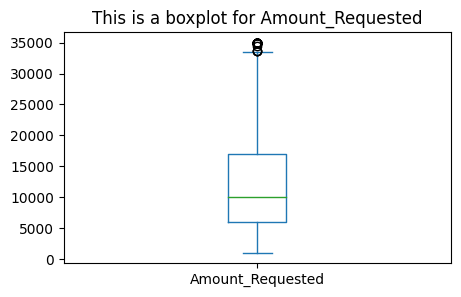

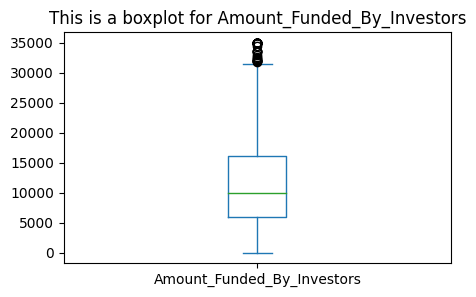

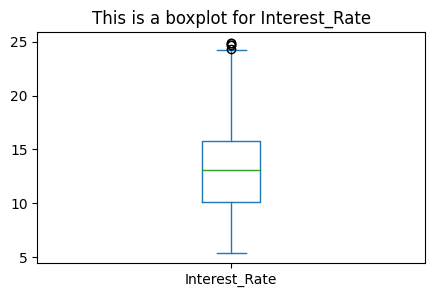

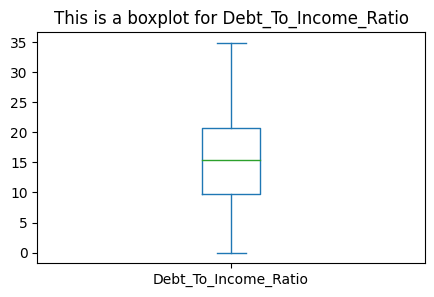

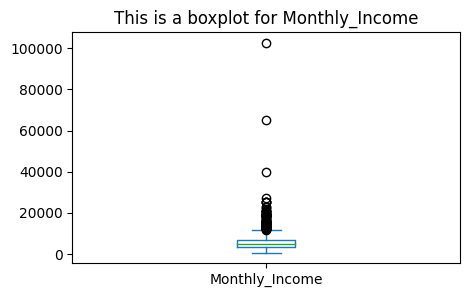

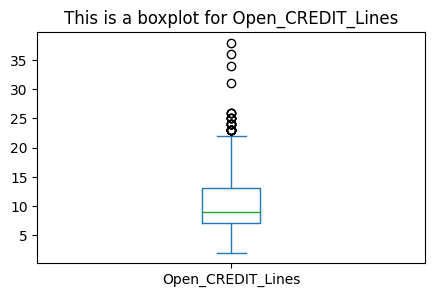

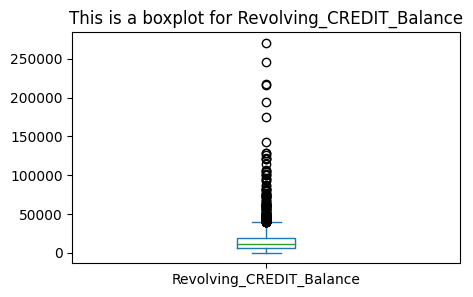

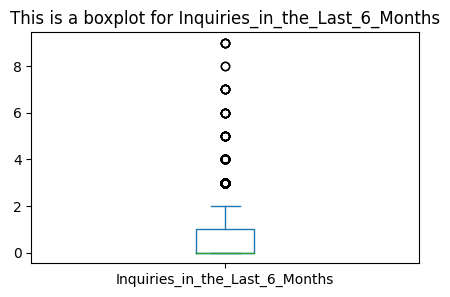

In [20]:
#To check outlier for all the variable
def func( x ):
    plt.figure( figsize = (5, 3) )
    plt.title( 'This is a boxplot for ' + x.name )
    x.plot(kind = 'box')
    plt.show()

cont_var.apply( func )
plt.show()

In [21]:
cont_var = cont_var.apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

#### combine the cat and cont variables

In [22]:
#Since we havent made any changes in the categoical and continuous variables so no need to combine them. We will use the original df only
df_loans = pd.concat([cat_var, cont_var], axis = 1 )
df_loans.shape

(2413, 14)

### a) Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [23]:
#grouping the requested loan amount into three groups:
df_loans['amount_cat'] = pd.qcut(x = df_loans.Amount_Requested, q = 3, labels=['low', 'mid', 'high'])

In [24]:
# declare the variable for which we want to do the analysis
var = 'Interest_Rate'

# filter the data based on amount_cat
low_amt = df_loans.loc[df_loans.amount_cat == 'low', var]
mid_amt = df_loans.loc[df_loans.amount_cat == 'mid', var]
high_amt = df_loans.loc[df_loans.amount_cat == 'high', var]

# display the mean of the three sample
print('mean interest rate for low amount: ', low_amt.mean(), 
          '| mean interest rate for mid amount: ', mid_amt.mean(), 
              '| mean interest rate for high amount: ', high_amt.mean() )

mean interest rate for low amount:  11.935852873563219 | mean interest rate for mid amount:  12.580082424242425 | mean interest rate for high amount:  15.002604456824514


Text(0.5, 1.0, 'Average Interest Rates by Different Amount Categories')

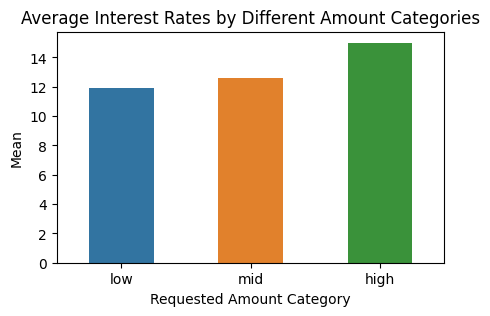

In [25]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Requested Amount Category': {0: 'low', 1: 'mid', 2: 'high'}, 
                   'Mean': {0: low_amt.mean(), 1: mid_amt.mean(), 2: high_amt.mean()}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x="Requested Amount Category", y = 'Mean', data = bar1, width= 0.5 )
plt.title("Average Interest Rates by Different Amount Categories")

#### From the above bar chart we can say that high interest rate is charged against the high requested amount and vice-versa. To confirm this we will conduct hypothesis testing. 
#### Since we need to find the relationship between two continuous variables we will perform Pearson's Correlation Test

*Pearson's Correlation Test*

#### Step 1: Hypothesis
                            Null hypothesis: There is no relationship between the Amount_Requested and Interest Rate.
                            Alternative hypothesis: There is an association between the Amount_Requested and Interest Rate.
#### Step 2: Criteria for Decision
                                    alpha = 0.05
                                    Accept null hypothesis if p-value is greater than alpha
                                    Reject null hypothesis if p-value is less than alpha
#### Step 3: Calculating Test Statistics and P-value

In [26]:
alpha = 0.05
s, p = stats.pearsonr(df_loans.Amount_Requested, df_loans.Interest_Rate)

#### Step 4: Making Decision

In [27]:
print(f'Alpha: {alpha} \nStatistics: {s} \nP-value: {p}')
if p > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Amount_Requested and Interest Rate.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Amount_Requested and Interest Rate.')

Alpha: 0.05 
Statistics: 0.3247783331605936 
P-value: 2.1824409019634344e-60
Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Amount_Requested and Interest Rate.


#### Step 5: Business Implications
With 95% confidence we can say that the there is a positive relationship between the Amount_Requested and Interest Rate. The larger the requested amount the more is the interested rate charged. So, Yes, the interest rate does varies with the loan amount but it is positively related (and not negative as asked in the question) which is also depicted in the bar chart as well.

### b) Checking if loan length is directly effecting interest rate

In [28]:
df_loans.Loan_Length.value_counts()

36 months    1876
60 months     537
Name: Loan_Length, dtype: int64

In [29]:
#formatting Loan Length column to remove 'months'
df_loans.loc[:, 'Loan_Length'] = df_loans.Loan_Length.str.replace(' months', ' ').astype('int')

In [30]:
# declare the variable for which we want to do the analysis
var = 'Interest_Rate'

# filter the data based on Loan Length
len_36_months = df_loans.loc[ df_loans.Loan_Length == 36, var ]
len_60_months = df_loans.loc[ df_loans.Loan_Length == 60, var ]

# display the mean of the two samples
print( 'Average interest rate for 36 month Loan Period: ', len_36_months.mean(), 
      '| Average interest rate for 60 month Loan Period: ', len_60_months.mean())

Average interest rate for 36 month Loan Period:  12.131517057569297 | Average interest rate for 60 month Loan Period:  16.342465549348233


Text(0.5, 1.0, 'Average Interest Rates by Loan Duration ')

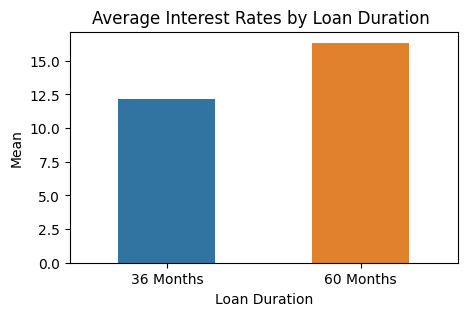

In [31]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Loan Duration': {0: '36 Months', 1: '60 Months'}, 
                   'Mean': {0: len_36_months.mean(), 1: len_60_months.mean()}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x='Loan Duration', y = 'Mean', data = bar1, width= 0.5 )
plt.title("Average Interest Rates by Loan Duration ")

#### Above analysis shows that the higher interest rates are charged for 60 month loan period where as lower interest rates are charged for 36 month loan period. To support the claim we will perform the Spearsman Rank Correlation

### Spearsman Rank Correlation Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the loan_length and Interest Rate.
                    Alternative hypothesis: There is an association between the loan_length and Interest Rate.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [32]:
alpha = 0.01
correlation, p = stats.spearmanr( df_loans.Loan_Length , df_loans.Interest_Rate )

#### Step 4: Making Decision

In [33]:
print(f'Alpha: {alpha} \nCorrelation: {correlation} \nP-value: {p}')
if p > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the loan_length and Interest Rate.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the loan_length and Interest Rate.')

Alpha: 0.01 
Correlation: 0.3908179455122753 
P-value: 6.962883930016338e-89
Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the loan_length and Interest Rate.


#### Step 5: Business Implications
With 99% confidence we can say that the there is a positive relationship between loan_length and Interest Rate. The higher the loan duration the higher is the interest rate that will be charged on the loan amount.

**Conclusion**: Loan Length is directly affecting the interest Rate

### c) Identifying if interest rate varies for different purpose of loans

In [34]:
# Unique values in column: Loan_Purpose
df_loans.Loan_Purpose.nunique()

14

In [35]:
# Unique values frequencies in column: Loan_Purpose
df_loans.Loan_Purpose.value_counts()

debt_consolidation    1262
credit_card            430
other                  189
home_improvement       147
major_purchase         100
small_business          83
car                     50
wedding                 37
moving                  29
medical                 28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [36]:
# declare the variable for which we want to do the analysis
var = 'Interest_Rate'

# filter the data based on segments
s1 = df_loans.loc[ df_loans.Loan_Purpose == 'debt_consolidation', var ]
s2 = df_loans.loc[ df_loans.Loan_Purpose == 'credit_card', var ]
s3 = df_loans.loc[ df_loans.Loan_Purpose == 'other', var ]
s4 = df_loans.loc[ df_loans.Loan_Purpose == 'home_improvement', var ]
s5 = df_loans.loc[ df_loans.Loan_Purpose == 'major_purchase', var ]
s6 = df_loans.loc[ df_loans.Loan_Purpose == 'small_business', var ]
s7 = df_loans.loc[ df_loans.Loan_Purpose == 'car', var ]
s8 = df_loans.loc[ df_loans.Loan_Purpose == 'wedding', var ]
s9 = df_loans.loc[ df_loans.Loan_Purpose == 'medical', var ]
s10 = df_loans.loc[ df_loans.Loan_Purpose == 'moving', var ]
s11 = df_loans.loc[ df_loans.Loan_Purpose == 'vacation', var ]
s12 = df_loans.loc[ df_loans.Loan_Purpose == 'house', var ]
s13 = df_loans.loc[ df_loans.Loan_Purpose == 'educational', var ]
s14 = df_loans.loc[ df_loans.Loan_Purpose == 'renewable_energy', var ]

# display the mean of the fourteen samples
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean(), 
        '| mean of s4: ', s4.mean(), '| mean of s5: ', s5.mean(), '| mean of s6: ', s6.mean(),
          '| mean of s7: ', s7.mean(), '| mean of s8: ', s8.mean(), '| mean of s9: ', s9.mean(),
            '| mean of s10: ', s10.mean(), '| mean of s11: ', s11.mean(), '| mean of s12: ', s12.mean(), 
              '| mean of s13: ', s13.mean(), '| mean of s14: ', s14.mean())

mean of s1:  13.585871632329638 | mean of s2:  13.020781395348836 | mean of s3:  13.23541798941799 | mean of s4:  11.625768707482994 | mean of s5:  10.831180000000002 | mean of s6:  12.892698795180724 | mean of s7:  11.11348 | mean of s8:  11.969567567567568 | mean of s9:  11.765500000000001 | mean of s10:  13.527034482758623 | mean of s11:  12.2827 | mean of s12:  13.447999999999999 | mean of s13:  10.874285714285714 | mean of s14:  9.8775


Text(0.5, 1.0, 'Average Interest Rates Charged for Different Loan Purpose ')

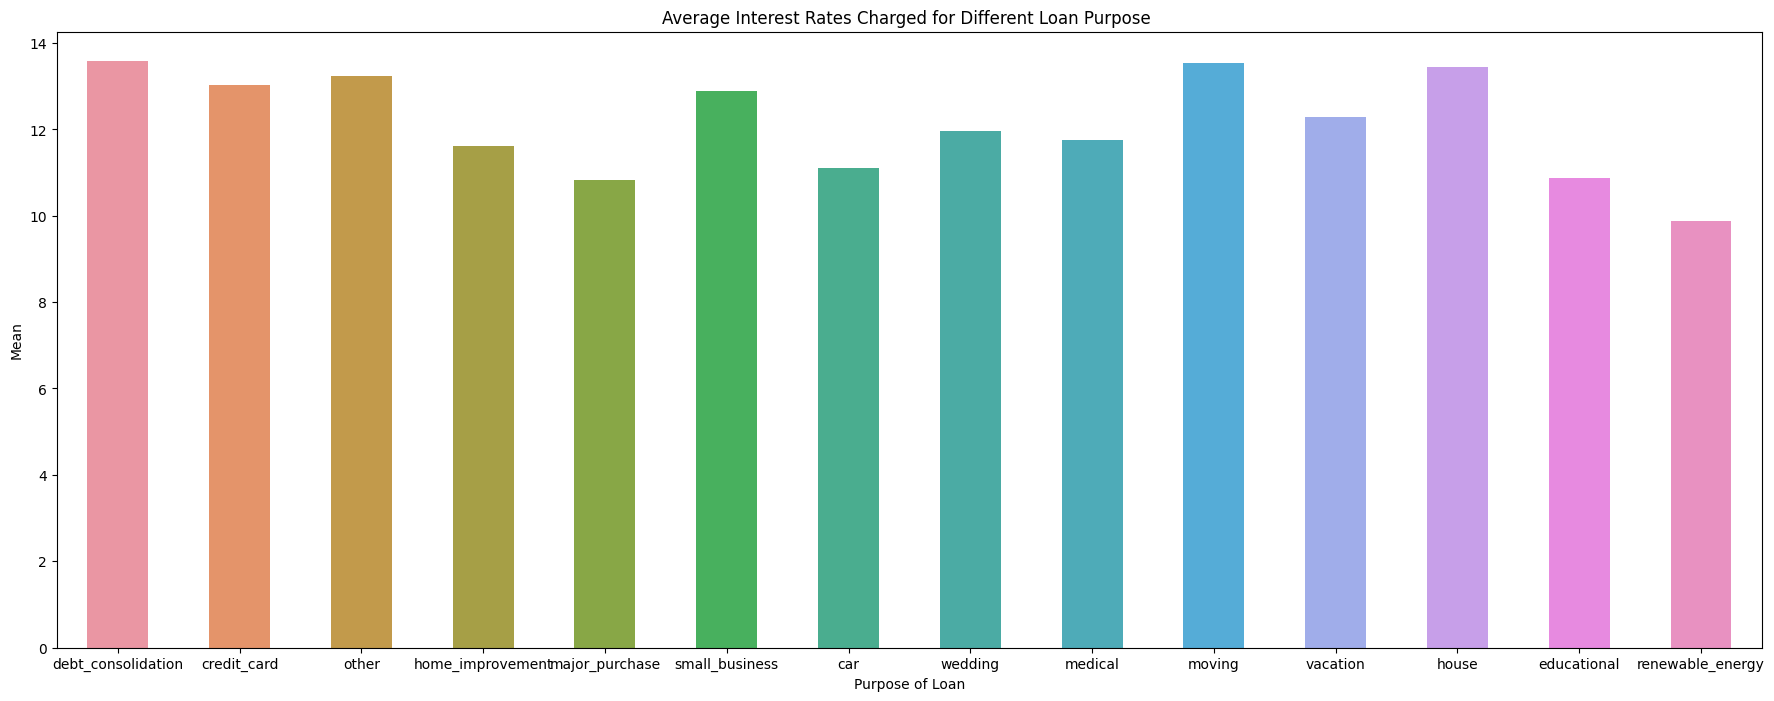

In [37]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Purpose of Loan': {0: 'debt_consolidation', 1: 'credit_card', 2:'other', 3:'home_improvement', 4:'major_purchase', 5:'small_business', 6:'car', 7:'wedding', 8:'medical', 9:'moving', 10: 'vacation', 11:'house', 12:'educational', 13:'renewable_energy'}, 
                   'Mean': {0: s1.mean(), 1: s2.mean(), 2: s3.mean(), 3: s4.mean(), 4: s5.mean(), 5: s6.mean(), 6: s7.mean(), 7: s8.mean(), 8: s9.mean(), 9: s10.mean(), 10: s11.mean(), 11: s12.mean(), 12: s13.mean(), 13: s14.mean()}}) 

fig = plt.figure(figsize = (22, 8))
sns.barplot(x='Purpose of Loan', y = 'Mean', data = bar1, width= 0.5)
plt.title("Average Interest Rates Charged for Different Loan Purpose ")

#### From the bar plot we can see that different interest rates are charged for different purpose of loan. We will confirm this further with the help of hypothesis testing.

#### Since one variable is categorical in nature and other is continuous and we have to make the comparison we will perform the ANOVA/F Test

### ANOVA or F-Test

#### Step 1: Hypothesis

                    Null hypothesis: All the samples are from SAME population, means are EQUAL
                    Alternative hypothesis: Samples are from DIFFERENT population, means are UNEQUAL

#### Step 2: Criteria for Decision

                alpha = 0.05
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [38]:
alpha = 0.05
s, p = stats.f_oneway( s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14)

#### Step 4: Making Decision

In [39]:
print(f'Alpha: {alpha} \nT-statistic: {s} \nP-value: {p}')
if p > alpha:
    print('Decision: Fail to Reject the Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population')

Alpha: 0.05 
T-statistic: 7.292345661311615 
P-value: 3.422559273002036e-14
Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population


#### Step 5: Business Implications
With 95% confidence we can say that different interest rates are charged depending on the purpose for which customer requires the loan.

### d) Identifying if there is relationship between FICO scores and Home Ownership or not.  

In [40]:
df_loans.FICO_Range.value_counts()

670-674    167
675-679    161
680-684    157
695-699    146
665-669    138
690-694    135
705-709    131
685-689    128
700-704    124
660-664    118
720-724    108
710-714    107
730-734     94
715-719     92
725-729     91
735-739     65
750-754     60
745-749     54
740-744     50
760-764     45
755-759     44
765-769     32
780-784     26
775-779     22
790-794     20
770-774     17
785-789     17
795-799     13
800-804     12
805-809     11
810-814      8
640-644      5
815-819      5
655-659      4
645-649      3
830-834      1
820-824      1
650-654      1
Name: FICO_Range, dtype: int64

In [41]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab(df_loans.FICO_Range, df_loans.Home_Ownership)
obs_freq

Home_Ownership,MORTGAGE,OTHER,OWN,RENT
FICO_Range,,,,
640-644,0,0,1,4
645-649,1,0,0,2
650-654,1,0,0,0
655-659,0,1,0,3
660-664,40,0,14,64
665-669,52,0,17,69
670-674,66,1,13,87
675-679,78,1,10,72
680-684,55,2,9,91


##### Since we have to find out the relationship between two categorical variables (i.e. FICO_Range and Home_Ownership) we will go with Chi Square Test

### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the FICO_Range and Home_Ownership.
                    Alternative hypothesis: There is an association between the FICO_Range and Home_Ownership.

#### Step 2: Criteria for Decision

                alpha = 0.05
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [42]:
alpha = 0.05
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq )

#### Step 4: Making Decision

In [43]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the FICO_Range and Home_Ownership.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the FICO_Range and Home_Ownership.')

Alpha: 0.05 
Chi-Score: 269.7881202757335 
P-value: 3.087547281383599e-15 
dof: 111 
Expected: [[2.29796933e+00 1.03605470e-02 3.91628678e-01 2.30004144e+00]
 [1.37878160e+00 6.21632822e-03 2.34977207e-01 1.38002487e+00]
 [4.59593867e-01 2.07210941e-03 7.83257356e-02 4.60008288e-01]
 [1.83837547e+00 8.28843763e-03 3.13302942e-01 1.84003315e+00]
 [5.42320763e+01 2.44508910e-01 9.24243680e+00 5.42809780e+01]
 [6.34239536e+01 2.85951098e-01 1.08089515e+01 6.34811438e+01]
 [7.67521757e+01 3.46042271e-01 1.30803978e+01 7.68213842e+01]
 [7.39946125e+01 3.33609615e-01 1.26104434e+01 7.40613344e+01]
 [7.21562370e+01 3.25321177e-01 1.22971405e+01 7.22213013e+01]
 [5.88280149e+01 2.65230004e-01 1.00256942e+01 5.88810609e+01]
 [6.20451720e+01 2.79734770e-01 1.05739743e+01 6.21011189e+01]
 [6.71007045e+01 3.02527973e-01 1.14355574e+01 6.71612101e+01]
 [5.69896395e+01 2.56941567e-01 9.71239121e+00 5.70410278e+01]
 [6.02067965e+01 2.71446332e-01 1.02606714e+01 6.02610858e+01]
 [4.91765437e+01 2.2171

#### Step 5: Business Implications
With 95% confidence we can say that the there is a relationship between FICO_Range and Home_Ownership.

## -------------------------------------------------       BUSINESS PROBLEM 2        -----------------------------------------------

##### Assess if there is any difference in the average price quotes provided by Mary and Barry

In [44]:
#Importing data

price_quotes = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Basic Statistics - Hypothesis Testing/Price_Quotes.csv')

In [45]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [46]:
price_quotes.describe()

,Order_Number,Barry_Price,Mary_Price
count,12.000000,12.000000,12.000000
mean,6.500000,124.333333,114.750000
std,3.605551,20.698412,11.054616
min,1.000000,94.000000,97.000000
25%,3.750000,106.750000,107.000000
50%,6.500000,131.000000,114.000000
75%,9.250000,140.500000,121.000000
max,12.000000,152.000000,133.000000


<AxesSubplot: xlabel='Order_Number'>

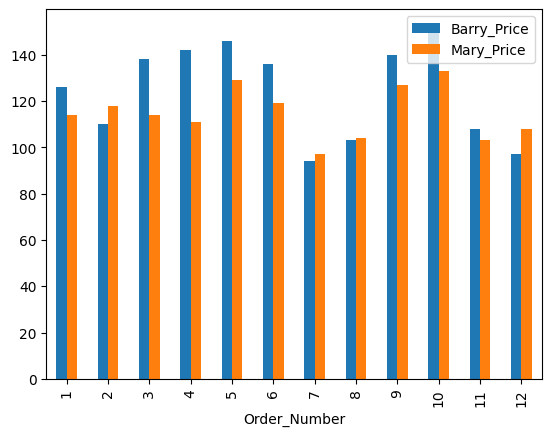

In [47]:
price_quotes.set_index("Order_Number").plot(kind="bar")

#### We see that Mary's average price quote is lower than Barry's average quote. But, comparing averages ignores sampling error.Thus, whetherMary's average quote is statistically lower than Barry's requires further investigation.

#### Also in reality, we are not concerned with how Marry's or Barry's quotes vary from order-to-order. What we really want to know is by how much Mary's quote for an order differs from Barry's quote for the same order. So instead of looking at the individual price columns in the data set, we might compute a new variable, *Difference* and compute a confidence interval for the average Difference.

In [48]:
price_quotes['Quote_Difference'] = price_quotes.Barry_Price - price_quotes.Mary_Price

In [49]:
price_quotes

,Order_Number,Barry_Price,Mary_Price,Quote_Difference
0,1,126,114,12
1,2,110,118,-8
2,3,138,114,24
3,4,142,111,31
4,5,146,129,17
5,6,136,119,17
6,7,94,97,-3
7,8,103,104,-1
8,9,140,127,13
9,10,152,133,19


In [50]:
print('Average of the Difference in the price quote is', price_quotes.Quote_Difference.mean())

Average of the Difference in the price quote is 9.583333333333334


#### So average of the Difference is not equal to zero. We will conduct a formal hypothesis test to determine whether the average Difference is statistically different from Zero. Since we are testing for differences between paired values, this is special case of a One Sample t-Test known as a Paired t-Test.

### Paired Sample t-Test or Relational T-Test

#### Step 1: Hypothesis

                    Null hypothesis: All the samples are from SAME population, means are EQUAL
                    Alternative hypothesis: Samples are from DIFFERENT population, means are UNEQUAL

#### Step 2: Criteria for Decision

                    alpha = 0.05
                    Accept null hypothesis if p-value is greater than alpha
                    Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating Test Statistic and P-value

In [51]:
# perform the test
alpha = 0.05
statistic, pvalue = stats.ttest_rel(price_quotes.Barry_Price,price_quotes.Mary_Price)

#### Step 4: Making Decision

In [52]:
print(f'Alpha: {alpha} \nT-statistic: {statistic} \nP-value: {pvalue}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population')

Alpha: 0.05 
T-statistic: 2.5213765108923494 
P-value: 0.02840588045242053
Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population


#### Step 5: Business Implications
    With 95% confidence we can say that the average price quoted by Barry and Mary are different. A first step in improving the pricing process would be to explore these differences.Do they use different tools, software or calculations to prepare their quotes? Do they have more difficulty with some quotes than with others? Is additional training required? Are there opportunities to simplify and standardize the process? Are they using best pricing practices?

## --------------------------------------------       BUSINESS PROBLEM 3        ---------------------------------------------

####  Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [53]:
treatment = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')

In [54]:
treatment.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [55]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [56]:
#renaming columns
treatment.rename( columns={'VAR4':'TRFF(%)','VAR5':'CI(%)'}, inplace=True)

In [57]:
#Checking for missing values
treatment.isnull().sum()

Month                0
Reengineer           0
Employee_Turnover    0
TRFF(%)              0
CI(%)                0
dtype: int64

In [58]:
#samples for pre and post Reengineering phase 
pre = treatment.loc[ treatment.Reengineer == 'Prior', 'CI(%)' ]
post = treatment.loc[ treatment.Reengineer == 'Post', 'CI(%)' ]

In [59]:
# print the avg/mean of two samples
print( 'mean of pre-engineering Phase:', round(pre.mean(), 1), 
          '| mean of post-engineering Phase:', round(post.mean(), 1))

mean of pre-engineering Phase: 53.9 | mean of post-engineering Phase: 23.3


Text(0.5, 1.0, 'Effect of Reengineering on Critical Incident Rate')

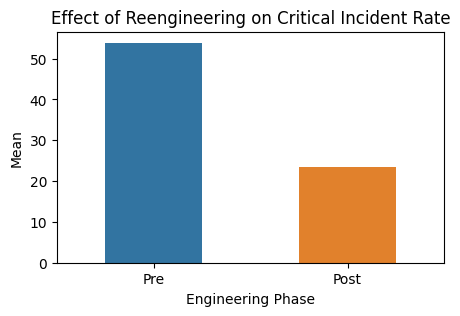

In [60]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Engineering Phase': {0: 'Pre', 1: 'Post'}, 
                   'Mean': {0: pre.mean(), 1: post.mean()}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x="Engineering Phase", y = 'Mean', data = bar1, width= 0.5 )
plt.title("Effect of Reengineering on Critical Incident Rate")

#### From the bar plot we can see that the Critical incident rates have declined sharply in the post-reenginerring phase. We will confirm this further with the help of hypothesis testing.

#### Since variable is continuous in nature and we have to make the comparison between the two independent samples we will perform the Independent sample ttest

### Independent T-Test

#### Step 1: Hypothesis

                Null hypothesis: pre_CI(%) = Post_CI(%) i.e. All the samples are from SAME population, means are EQUAL
                Alternative hypothesis: pre_CI(%) <> Post_CI(%) i.e.Samples are from DIFFERENT population, means are UNEQUAL

#### Step 2: Criteria for Decision

                    alpha = 0.05
                    Accept null hypothesis if p-value is greater than alpha
                    Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating Test Statistic and P-value

In [61]:
# perform the test
alpha = 0.05
statistic, pvalue = stats.ttest_ind( pre, post )

#### Step 4: Making Decision

In [62]:
print(f'Alpha: {alpha} \nT-statistic: {statistic} \nP-value: {pvalue}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population')

Alpha: 0.05 
T-statistic: 1.627914425352865 
P-value: 0.12091989189884148
Decision: Accept Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population


##### 
    Note: The P-value is very close to 0.1. If we change the alpha to greater then 0.1 we can reject the Null Hypothesis. So it depends on the client/Business requirement how much accuracy they require in the prediction.

#### Step 5: Business Implications
    WIth the give data we can not say that their is any effect of the reengineering efforts.

## --------------------------------------------       BUSINESS PROBLEM 4        ---------------------------------------------

### Focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs.

In [63]:
assessment = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')

In [64]:
assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [65]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [66]:
#Checking for any missing values
assessment.isna().sum()

Days        0
Priority    0
dtype: int64

In [67]:
#To check if the system is working we will first segregate the data for hypothesis testing purpose
high=assessment[assessment.Priority=='High'].Days
medium=assessment[assessment.Priority=='Medium'].Days
low=assessment[assessment.Priority=='Low'].Days

In [68]:
# print the avg/mean of three samples
print( 'mean of high Priority jobs:', round(high.mean(), 1), 
          '| mean of medium Priority jobs:', round(medium.mean(), 1),
             '| mean of low Priority jobs:', round(low.mean(), 1))

mean of high Priority jobs: 3.0 | mean of medium Priority jobs: 2.5 | mean of low Priority jobs: 4.2


Text(0.5, 1.0, 'Analysis of Job Prioritization System')

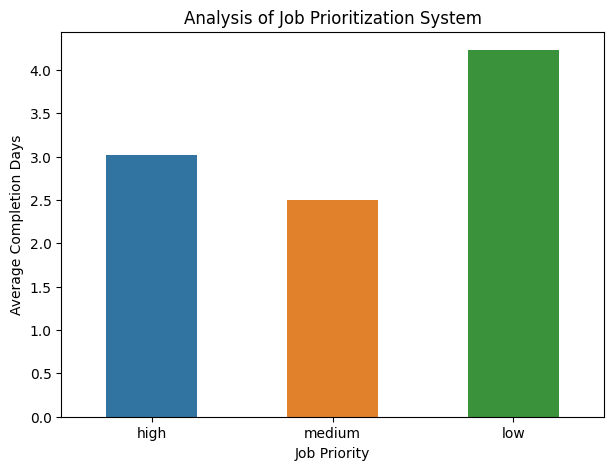

In [69]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Job Priority': {0: 'high', 1: 'medium', 2: 'low'}, 
                   'Average Completion Days': {0: high.mean(), 1: medium.mean(), 2: low.mean()}}) 

fig = plt.figure(figsize = (7, 5))
sns.barplot(x="Job Priority", y = 'Average Completion Days', data = bar1, width= 0.5 )
plt.title("Analysis of Job Prioritization System")

#### From the bar plot we can see that the Job Prioritization system is not working especially in case of high priority jobs. Medium priority jobs are finished before low priority job but high priority jobs average completion time is greater than the medium priority jobs. We will confirm this further with the help of hypothesis testing.

#### Since variables are continuous in nature and we have to make the comparison between them we will perform the f-test

### ANOVA/F-Test

#### Step 1: Hypothesis
                       Null hypothesis: High, medium and low priority jobs are taking almost same average time i.e.all the 
                       samples are from SAME population, means are EQUAL
                       Alternative hypothesis: High, medium and low priority jobs are taking different average time i.e. 
                       samples are from DIFFERENT population, means are UNEQUAL
#### Step 2: Criteria for Decision
                                    alpha = 0.05
                                    Accept null hypothesis if p-value is greater than alpha
                                    Reject null hypothesis if p-value is less than alpha
#### Step 3: Calculating Test Statistics and P-value

In [70]:
# perform the test
s, p = stats.f_oneway( high, medium, low )

#### Step 4: Making Decision

In [71]:
print(f'Alpha: {alpha} \nT-statistic: {s} \nP-value: {p}')
if p > alpha:
    print('Decision: Fail to Reject the Null Hypothesis as p-value is greater than alpha. Hence High, medium and low priority jobs are taking almost same average time')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence High, medium and low priority jobs are taking different average time')

Alpha: 0.05 
T-statistic: 1.812311010076072 
P-value: 0.16411459461716182
Decision: Fail to Reject the Null Hypothesis as p-value is greater than alpha. Hence High, medium and low priority jobs are taking almost same average time


#### Step 5: Business Implications
With the given data we cannot say that the prioritization system is working.

## --------------------------------------------       BUSINESS PROBLEM 5 ---------------------------------------------

##### Use the survey results to address the following questions
* What is the overall level of customer satisfaction?
* What factors are linked to satisfaction?
* What is the demographic profile of Film on the Rocks patrons?
* In what media outlet(s) should the film series be advertised?

In [72]:
#Importing the dataset
films = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Basic Statistics - Hypothesis Testing/Films.csv')

In [73]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [74]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [75]:
#Checking for missing values
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [76]:
#missing value imputation
for col in films.columns:
    films[col].fillna(value = films[col].mode()[0], inplace=True)

##### Encoding of categorical variables

In [77]:
films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [78]:
#converting males to 1 and females to 2 
films['Gender'] = np.where(films.Gender == 'Male', 1, 
                           np.where(films.Gender == 'Female', 2, 
                                    np.where(films.Gender == '1', 1, 2)))

In [79]:
films.Marital_Status.value_counts()

2          210
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [80]:
#correcting Marital Status
films['Marital_Status'] = np.where(films.Marital_Status == 'Married', 1, 
                                   np.where(films.Marital_Status == 'Single', 2, 
                                            np.where(films.Marital_Status == 'Slngle', 2, 
                                                     np.where(films.Marital_Status == '1', 1, 2))))

In [81]:
films.Marital_Status.value_counts()

2    230
1    100
Name: Marital_Status, dtype: int64

### (a) What is the overall level of customer satisfaction?

In [82]:
#Lets check the overall average customer satisfaction at:
    #Confidence Level : 95%

    #CL: (mean-1.96*std, mean+1.96*std)

overall_mean = round(films.Overall.mean(),2)

stdev=films.Overall.std()
print('mean:', stdev)

SE=stdev/np.sqrt(330)
print('Standard Error:', SE)

CL=(overall_mean-1.96*(SE), overall_mean+1.96*(SE))
print('CL:', CL)

mean: 0.6878262202585181
Standard Error: 0.037863587260422576
CL: (1.5457873689695718, 1.6942126310304284)


In [83]:
#Overall customer satisfaction lies between 1.54 and 1.69 which is good

### (b) What factors are linked to satisfaction?

In [84]:
films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5


In [115]:
#To check the factors that are linked to satisfaction we will run the Chi-square test:
#1) between Overall and Signage
#2) between Overall and parking
#3) between Overall and clean
#4) between Overall and Gender
#5) between Overall and Marital Status

##### finding out relationship between Sinage and Overall

In [86]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( films.Overall, films.Sinage )
obs_freq

Sinage,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,90,44,13,2,2
2.0,22,109,25,4,2
3.0,0,4,8,0,0
4.0,0,0,1,0,0
5.0,1,1,1,0,1


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Sinage and Overall Score.
                    Alternative hypothesis: There is an association between the Sinage and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [87]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq )

#### Step 4: Making Decision

In [88]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Sinage and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Sinage and Overall Score.')

Alpha: 0.01 
Chi-Score: 125.61859671027882 
P-value: 4.532989700034049e-19 
dof: 16 
Expected: [[5.17060606e+01 7.22969697e+01 2.19636364e+01 2.74545455e+00
  2.28787879e+00]
 [5.54727273e+01 7.75636364e+01 2.35636364e+01 2.94545455e+00
  2.45454545e+00]
 [4.10909091e+00 5.74545455e+00 1.74545455e+00 2.18181818e-01
  1.81818182e-01]
 [3.42424242e-01 4.78787879e-01 1.45454545e-01 1.81818182e-02
  1.51515152e-02]
 [1.36969697e+00 1.91515152e+00 5.81818182e-01 7.27272727e-02
  6.06060606e-02]]
Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Sinage and Overall Score.


##### finding out relationship between Parking and Overall

In [89]:
# get the ob_freq_table from the dataset
obs_freq_2 = pd.crosstab( films.Overall, films.Parking )
obs_freq_2

Parking,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,105,40,4,2,0
2.0,27,111,20,3,1
3.0,2,3,5,1,1
4.0,0,0,0,0,1
5.0,1,1,0,1,1


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Parking and Overall Score.
                    Alternative hypothesis: There is an association between the Parking and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [90]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq_2 )

#### Step 4: Making Decision

In [91]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Parking and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Parking and Overall Score.')

Alpha: 0.01 
Chi-Score: 230.61691663391673 
P-value: 4.783162283608565e-40 
dof: 16 
Expected: [[6.17727273e+01 7.09242424e+01 1.32696970e+01 3.20303030e+00
  1.83030303e+00]
 [6.62727273e+01 7.60909091e+01 1.42363636e+01 3.43636364e+00
  1.96363636e+00]
 [4.90909091e+00 5.63636364e+00 1.05454545e+00 2.54545455e-01
  1.45454545e-01]
 [4.09090909e-01 4.69696970e-01 8.78787879e-02 2.12121212e-02
  1.21212121e-02]
 [1.63636364e+00 1.87878788e+00 3.51515152e-01 8.48484848e-02
  4.84848485e-02]]
Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Parking and Overall Score.


##### finding out relationship between Clean and Overall

In [92]:
# get the ob_freq_table from the dataset
obs_freq_3 = pd.crosstab( films.Overall, films.Clean )
obs_freq_3

Clean,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,104,39,6,1,1
2.0,35,109,14,4,0
3.0,3,5,4,0,0
4.0,0,1,0,0,0
5.0,2,1,0,0,1


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Clean and Overall Score.
                    Alternative hypothesis: There is an association between the Clean and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [93]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq_3 )

#### Step 4: Making Decision

In [94]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Clean and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Clean and Overall Score.')

Alpha: 0.01 
Chi-Score: 127.7194555599952 
P-value: 1.7772535915433765e-19 
dof: 16 
Expected: [[6.58909091e+01 7.09242424e+01 1.09818182e+01 2.28787879e+00
  9.15151515e-01]
 [7.06909091e+01 7.60909091e+01 1.17818182e+01 2.45454545e+00
  9.81818182e-01]
 [5.23636364e+00 5.63636364e+00 8.72727273e-01 1.81818182e-01
  7.27272727e-02]
 [4.36363636e-01 4.69696970e-01 7.27272727e-02 1.51515152e-02
  6.06060606e-03]
 [1.74545455e+00 1.87878788e+00 2.90909091e-01 6.06060606e-02
  2.42424242e-02]]
Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Clean and Overall Score.


##### finding out relationship between Gender and Overall

In [95]:
# get the ob_freq_table from the dataset
obs_freq_4 = pd.crosstab( films.Overall, films.Gender )
obs_freq_4

Gender,1,2
Overall,,
1.0,49,102
2.0,59,103
3.0,7,5
4.0,0,1
5.0,2,2


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Gender and Overall Score.
                    Alternative hypothesis: There is an association between the Gender and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [96]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq_4 )

#### Step 4: Making Decision

In [97]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Gender and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Gender and Overall Score.')

Alpha: 0.01 
Chi-Score: 4.325375175990271 
P-value: 0.36375838131773974 
dof: 4 
Expected: [[ 53.53636364  97.46363636]
 [ 57.43636364 104.56363636]
 [  4.25454545   7.74545455]
 [  0.35454545   0.64545455]
 [  1.41818182   2.58181818]]
Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Gender and Overall Score.


##### finding out relationship between Marital Status and Overall

In [98]:
# get the ob_freq_table from the dataset
obs_freq_5 = pd.crosstab( films.Overall, films.Marital_Status )
obs_freq_5

Marital_Status,1,2
Overall,,
1.0,46,105
2.0,51,111
3.0,2,10
4.0,1,0
5.0,0,4


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Marital Status and Overall Score.
                    Alternative hypothesis: There is an association between the Marital Status and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [99]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq_5 )

#### Step 4: Making Decision

In [100]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Marital Status and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Marital Status and Overall Score.')

Alpha: 0.01 
Chi-Score: 5.2040167002591415 
P-value: 0.26699728606451045 
dof: 4 
Expected: [[ 45.75757576 105.24242424]
 [ 49.09090909 112.90909091]
 [  3.63636364   8.36363636]
 [  0.3030303    0.6969697 ]
 [  1.21212121   2.78787879]]
Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Marital Status and Overall Score.


##### finding out relationship between Income and Overall

In [101]:
# get the ob_freq_table from the dataset
obs_freq_6 = pd.crosstab( films.Overall, films.Income )
obs_freq_6

Income,1.0,2.0,3.0
Overall,,,
1.0,72,41,38
2.0,76,36,50
3.0,7,4,1
4.0,1,0,0
5.0,2,1,1


### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Income and Overall Score.
                    Alternative hypothesis: There is an association between the Income and Overall Score.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [102]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq_6 )

#### Step 4: Making Decision

In [103]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Income and Overall Score.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Income and Overall Score.')

Alpha: 0.01 
Chi-Score: 5.116831652586109 
P-value: 0.7450191587030258 
dof: 8 
Expected: [[72.2969697  37.52121212 41.18181818]
 [77.56363636 40.25454545 44.18181818]
 [ 5.74545455  2.98181818  3.27272727]
 [ 0.47878788  0.24848485  0.27272727]
 [ 1.91515152  0.99393939  1.09090909]]
Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Income and Overall Score.


##### OBSERVATION:
So with 99% confidence we can say that three factors (Sinage, Parking, and Clean) are having positive relationship with Overall Score whereas Gender, Marital Status and Income is showing no association with the Overall Satisfaction or we do not have sufficient data to say that Gender, Marital Status and Income are associated with Overall Satisfaction score.

### (c) What is the demographic profile of Film on the Rocks patrons?

In [104]:
#Demographic profile of films based on Gender
demo_gender = films.groupby(['Gender'])['Movie'].value_counts()
demo_gender

Gender  Movie                  
1       Willy Wonka                 53
        Ferris Buellers Day Off     51
        Old School                  13
2       Willy Wonka                108
        Ferris Buellers Day Off     86
        Old School                  19
Name: Movie, dtype: int64

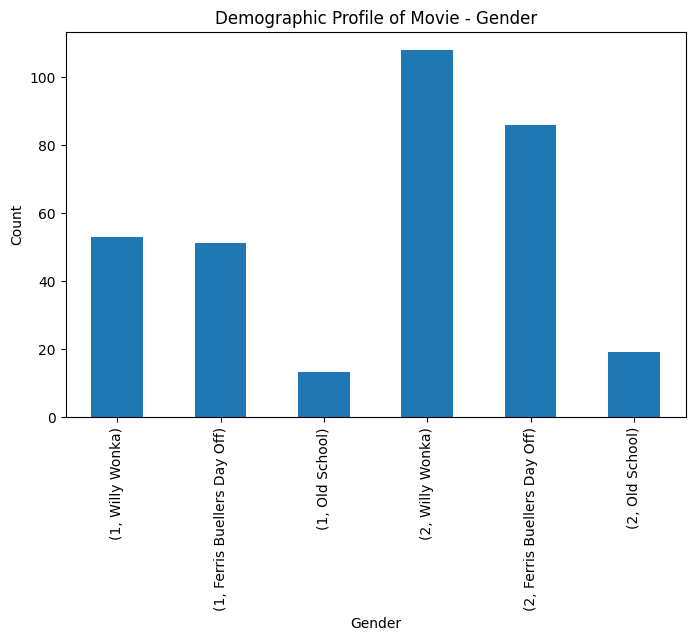

In [105]:
demo_gender.plot(kind='bar', figsize=(8, 5))
plt.title('Demographic Profile of Movie - Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.legend(title='Product')
plt.show()

In [106]:
#Demographic profile of films based on marital Status
demo_marital = films.groupby(['Marital_Status'])['Movie'].value_counts()
demo_marital

Marital_Status  Movie                  
1               Willy Wonka                 48
                Ferris Buellers Day Off     41
                Old School                  11
2               Willy Wonka                113
                Ferris Buellers Day Off     96
                Old School                  21
Name: Movie, dtype: int64

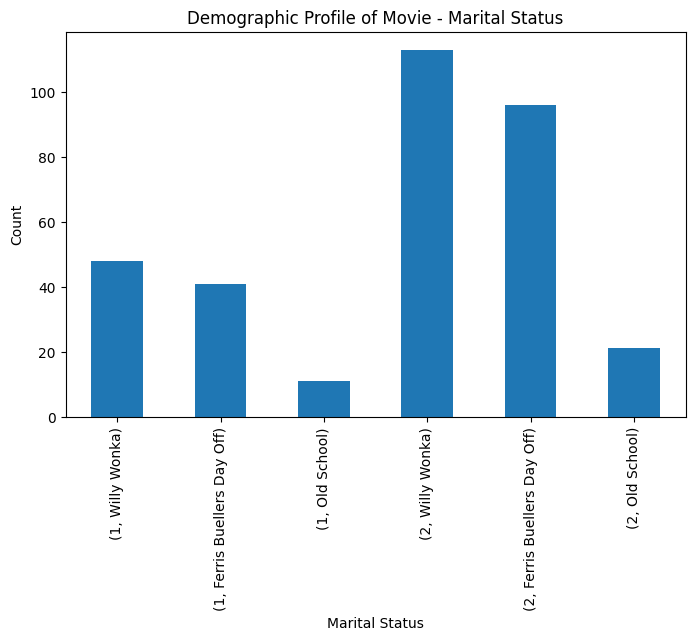

In [107]:
demo_marital.plot(kind='bar', figsize=(8, 5))
plt.title('Demographic Profile of Movie - Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
#plt.legend(title='Product')
plt.show()

In [108]:
#Demographic profile of films based on Age
demo_age = films.groupby(['Age'])['Movie'].value_counts()
demo_age

Age  Movie                  
1.0  Ferris Buellers Day Off    12
     Willy Wonka                12
     Old School                  2
2.0  Willy Wonka                87
     Ferris Buellers Day Off    70
     Old School                 20
3.0  Willy Wonka                59
     Ferris Buellers Day Off    48
     Old School                 10
4.0  Ferris Buellers Day Off     7
     Willy Wonka                 3
Name: Movie, dtype: int64

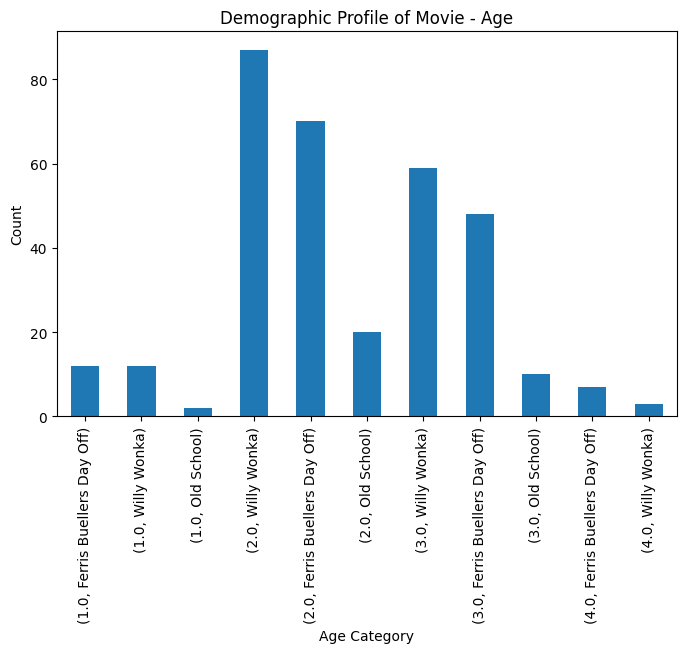

In [109]:
demo_age.plot(kind='bar', figsize=(8, 5))
plt.title('Demographic Profile of Movie - Age')
plt.xlabel('Age Category')
plt.ylabel('Count')
#plt.legend(title='Product')
plt.show()

In [110]:
#Demographic profile of films based on Income
demo_inc = films.groupby(['Income'])['Movie'].value_counts()
demo_inc

Income  Movie                  
1.0     Willy Wonka                83
        Ferris Buellers Day Off    61
        Old School                 14
2.0     Ferris Buellers Day Off    39
        Willy Wonka                36
        Old School                  7
3.0     Willy Wonka                42
        Ferris Buellers Day Off    37
        Old School                 11
Name: Movie, dtype: int64

In [111]:
demo_inc.values

array([83, 61, 14, 39, 36,  7, 42, 37, 11], dtype=int64)

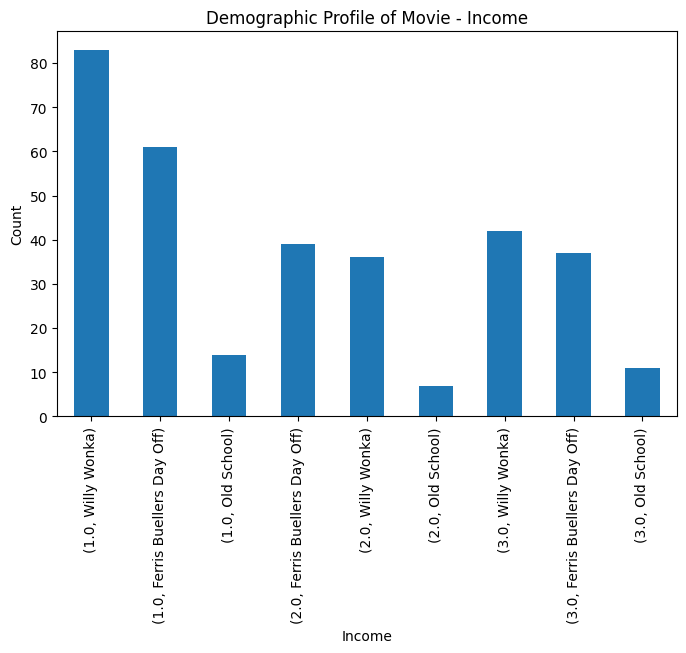

In [112]:
demo_inc.plot(kind='bar', figsize=(8, 5))
plt.title('Demographic Profile of Movie - Income')
plt.xlabel('Income')
plt.ylabel('Count')
#plt.legend(title='Product')
plt.show()

##### OBSERVATIONS:
1) There are more no. of FEMALES.

2) There are more no. of SINGLES.

3) Most people are from Age group 2.0 (13-30yrs) and Age Group 3.0 (31-60yrs)

4) Most people are from income group of 1.0 i.e. (Less than $50,000).

### (d) In what media outlet(s) should the film series be advertised?

In [113]:
films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

    Respondents could check any of the following that applied: 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth. 
    As most film viewers are coming by "word of mouth" but it does not come under media outlet so, we'll go with the second option which is 4.0 i.e. WEBSITE Therefore, film series should be advertised mainly in WEBSITE media outlet.

##### ------------------------------------------------------------------------------------THANK YOU-------------------------------------------------------------------------------------------------